# GTZAN dataset music genre classification - K nearest neighours 

# Data Preprocessing

Import libraries, standardize and split data into train, test, and valid datasets. 

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [397]:
#creating dataframe from dataset
df = pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [398]:
df = df.drop(['filename','length'], axis=1)
ynonhot = df["label"]

# generate all the unique genres and map them to an index 
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(df[["label"]])
y

minmaxscalar = preprocessing.MinMaxScaler()
df.loc[:, df.columns != 'label'] = minmaxscalar.fit_transform(df.loc[:, df.columns != 'label'])

df.head()
x,y = (df.iloc[:,df.columns != "label"],y)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30)
X_train.shape

# Further split data into validation sets 
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,test_size=0.33)
print(X_test.shape,y_test.shape)

(2007, 57) (2007, 10)


# Model Evaluation

Initliazed baseline model with K = 11 (11 neighbours). 
Evaluate model with accuracy, error, precision, recall, f1 scores, and a confusion matrix. 
Accuracy and error scores were applied on all 3 datasets to determine bias vs variance (whether the model is overfitting or underfitting). 

In [399]:
#Create KNN Classifier (baseline)
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
#knn.fit(nca.transform(X_train), y_train)
knn.fit(X_train, y_train)
#Predict the response for the 3 datasets
acc_knn_valid = knn.score(X_valid, y_valid)
acc_knn_train = knn.score(X_train, y_train)
acc_knn_test = knn.score(X_test, y_test)


print('valid score: ',acc_knn_valid)
print('train score: ',acc_knn_train)
print('test score: ',acc_knn_test)

valid score:  0.7575757575757576
train score:  0.821964821964822
test score:  0.7648231190832088


In [400]:
acc = []

# Calculating acc for K values between 1 and 57
for k in range(1,58):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

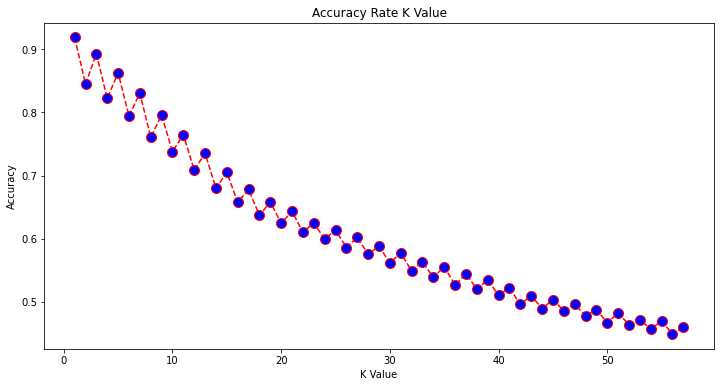

In [401]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 58), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [417]:
#Create KNN Classifier (baseline)
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
#knn.fit(nca.transform(X_train), y_train)
knn.fit(X_train, y_train)
#Predict the response for the 3 datasets
test_err = knn.predict(X_test)
print('Test Error: ',(np.mean(test_err != y_test)))

train_err = knn.predict(X_train)
print('Train Error: ',(np.mean(pred_i != y_test)))

valid_err = knn.predict(X_valid)
print('Valid Error: ',(np.mean(pred_i != y_test)))

Test Error:  0.030991529646238167
Train Error:  0.060787244643746886
Valid Error:  0.060787244643746886


In [402]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 58):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

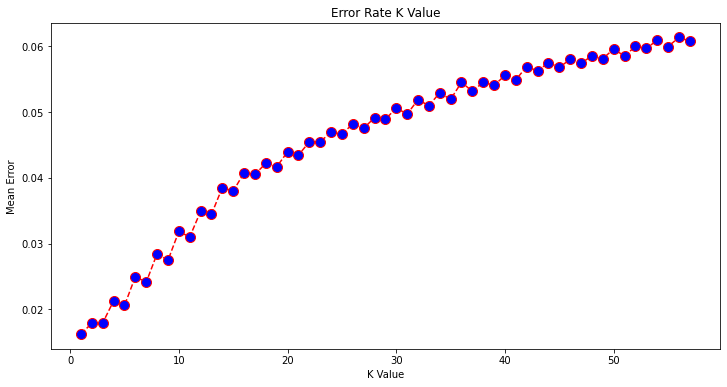

In [403]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 58), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [415]:
#precision, recall, and f1 scores for y_test and y_pred
from sklearn.metrics import precision_score,recall_score, f1_score

precision = precision_score(y_test, y_pred, average=None)
recall_score = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print('Precsion:',precision)
print('Recall:', recall_score)
print('F1 Score:', f1)

Precsion: [0.94974874 0.94923858 0.88205128 0.92890995 0.96335079 0.91150442
 0.97382199 0.96907216 0.921875   0.89099526]
Recall: [0.94029851 0.95897436 0.86868687 0.96078431 0.92929293 0.91964286
 0.97894737 0.92610837 0.95675676 0.89952153]
F1 Score: [0.945      0.95408163 0.87531807 0.94457831 0.94601542 0.91555556
 0.97637795 0.94710327 0.93899204 0.8952381 ]


In [405]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusionmatrix.pdf")

Confusion matrix, without normalization
[[184   2   2   0   0   6   1   0   6   0]
 [ 23 170   0   0   0   2   0   0   0   0]
 [134   2  56   0   0   0   0   0   2   4]
 [114   2   0  83   0   0   1   0   1   3]
 [109   0   1   1  59   0   4  12  11   1]
 [105  21   0   1   0  97   0   0   0   0]
 [ 45   0   0   2   0   0 137   0   0   6]
 [ 68   1   0   3   0   0   0 130   1   0]
 [ 95   0   0   3   5   1   0   3  78   0]
 [149   0   3  10   0   2   3   0   4  38]]


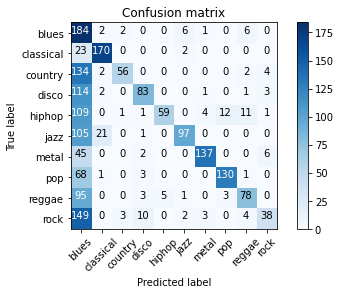

In [406]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot
preds = np.argmax(y_pred,axis=1)
label = np.argmax(y_test,axis=1)
cm = confusion_matrix(label,preds)
test_label = df["label"].unique()
label = list(test_label)
plot_confusion_matrix(cm, label,title='Confusion matrix')

# Hyperparameter Finetuning

The baseline model did not perform well in evaluation, as the model is overfitting due to its high variance. 
The grid search function was used to determine the best metric, K value, and weights that resulted in the highest accuracy of the model.

In [407]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors':list(range(2,10)),
    'weights' :['uniform','distance'],
    'metric' :['euclidean','manhattan']
}
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose =1, cv =3,n_jobs =-1)
gs_results = gs.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [408]:
gs_results.best_score_
gs_results.best_estimator_
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

# Final Model

After applying the new paramters to the model, the accuracy greatly improved from 76% to 93%. 

In [409]:
#k = 2
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2,weights = 'distance',
                          metric='manhattan')


knn.fit(X_train, y_train)

#Predict the response for the 3 datasets
acc_knn_valid = knn.score(X_valid, y_valid)
acc_knn_train = knn.score(X_train, y_train)
acc_knn_test = knn.score(X_test, y_test)


print('valid score: ',acc_knn_valid)
print('train score: ',acc_knn_train)
print('test score: ',acc_knn_test)

valid score:  0.908080808080808
train score:  0.9988559988559989
test score:  0.9332336821126059


In [419]:
#Create KNN Classifier (baseline)
knn = KNeighborsClassifier(n_neighbors=2,weights = 'distance',
                          metric='manhattan')

#Train the model using the training sets
#knn.fit(nca.transform(X_train), y_train)
knn.fit(X_train, y_train)
#Predict the response for the 3 datasets
test_err = knn.predict(X_test)
print('Test Error: ',(np.mean(test_err != y_test)))

train_err = knn.predict(X_train)
print('Train Error: ',(np.mean(pred_i != y_test)))

valid_err = knn.predict(X_valid)
print('Valid Error: ',(np.mean(pred_i != y_test)))

Test Error:  0.013353263577478824
Train Error:  0.060787244643746886
Valid Error:  0.060787244643746886


Confusion matrix, without normalization
[[189   0   4   0   1   0   0   0   4   3]
 [  1 187   0   0   0   7   0   0   0   0]
 [  4   1 172   1   2   9   0   0   3   6]
 [  0   0   2 196   0   0   1   1   0   4]
 [  0   0   1   2 184   1   1   3   2   4]
 [  2   9   6   0   0 206   0   0   1   0]
 [  0   0   1   0   0   0 186   0   0   3]
 [  0   0   3   4   2   0   0 188   3   3]
 [  0   0   4   1   1   1   0   1 177   0]
 [  3   0   2   7   1   2   3   1   2 188]]


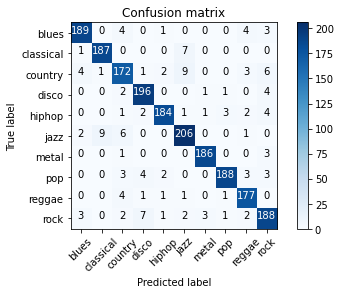

In [412]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot
y_pred = knn.predict(X_test)
preds = np.argmax(y_pred,axis=1)
label = np.argmax(y_test,axis=1)
cm = confusion_matrix(label,preds)
test_label = df["label"].unique()
label = list(test_label)
plot_confusion_matrix(cm, label,title='Confusion matrix')
#hashtage identity matrix uwu